In [2]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.quantum_info import  Statevector
from qiskit.visualization import plot_histogram

In [23]:
simulator = Aer.get_backend('qasm_simulator')
circ = QuantumCircuit(4, 4)
circ.h(1)
circ.h(2)
circ.cz(0,1)
circ.cz(1,2)
circ.cz(1,3)
circ.barrier(0)
circ.barrier(0)
circ.barrier()

circ.h(0)
circ.measure(0,0)
circ.h(0)
circ.h(1)
circ.measure(1,1)
circ.h(1)
circ.barrier()
circ.measure(2,2)
circ.measure(3,3)


In [24]:
circ.draw()

░  ░  ░ ┌───┐┌─┐┌───┐      ░       
q_0: ──────■──░──░──░─┤ H ├┤M├┤ H ├──────░───────
     ┌───┐ │  ░  ░  ░ ├───┤└╥┘└┬─┬┘┌───┐ ░       
q_1: ┤ H ├─■──■──■──░─┤ H ├─╫──┤M├─┤ H ├─░───────
     ├───┤    │  │  ░ └───┘ ║  └╥┘ └───┘ ░ ┌─┐   
q_2: ┤ H ├────■──┼──░───────╫───╫────────░─┤M├───
     └───┘       │  ░       ║   ║        ░ └╥┘┌─┐
q_3: ────────────■──░───────╫───╫────────░──╫─┤M├
                    ░       ║   ║        ░  ║ └╥┘
c_0: ═══════════════════════╩═══╬═══════════╬══╬═
                                ║           ║  ║ 
c_1: ═══════════════════════════╩═══════════╬══╬═
                                            ║  ║ 
c_2: ═══════════════════════════════════════╩══╬═
                                               ║ 
c_3: ══════════════════════════════════════════╩═

In [25]:
counts = execute(circ,simulator).result().get_counts() #使用指定的那个的模拟器运行电路，并获取运行结果，得到每种输入出现了几次(默认运行1024次)
print(counts)

{'0001': 247, '0111': 267, '0000': 253, '0110': 257}


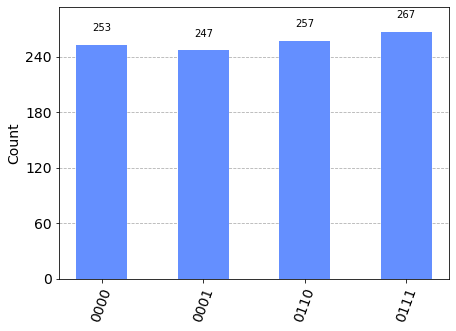

In [26]:
plot_histogram(counts)